In [1]:
import torch
import torchaudio

print(torch.__version__)
print(torchaudio.__version__)
str(torchaudio.get_audio_backend())

2.0.1
2.0.2


'soundfile'

In [2]:
import pandas as pd
path = "E:\Data\ESC-50-master\ESC-50-master"

meta_df = pd.read_csv(path + "/meta/esc50.csv")

display(meta_df.head())

,filename,fold,target,category,esc10,src_file,take
0,1-100032-A-0.wav,1,0,dog,True,100032,A
1,1-100038-A-14.wav,1,14,chirping_birds,False,100038,A
2,1-100210-A-36.wav,1,36,vacuum_cleaner,False,100210,A
3,1-100210-B-36.wav,1,36,vacuum_cleaner,False,100210,B
4,1-101296-A-19.wav,1,19,thunderstorm,False,101296,A


In [3]:
meta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  2000 non-null   object
 1   fold      2000 non-null   int64 
 2   target    2000 non-null   int64 
 3   category  2000 non-null   object
 4   esc10     2000 non-null   bool  
 5   src_file  2000 non-null   int64 
 6   take      2000 non-null   object
dtypes: bool(1), int64(3), object(3)
memory usage: 95.8+ KB


In [4]:
# 興味あるはfold, target とcategory
categories = meta_df["category"].unique()
folds = meta_df["fold"].unique()
print(len(folds), folds)
print("データセットの数", meta_df.shape[0])
print(len(categories), categories[:10])
print(len(meta_df["filename"].unique()), "全部のファイル名はユニーク")

5 [1 2 3 4 5]
データセットの数 2000
50 ['dog' 'chirping_birds' 'vacuum_cleaner' 'thunderstorm' 'door_wood_knock'
 'can_opening' 'crow' 'clapping' 'fireworks' 'chainsaw']
2000 全部のファイル名はユニーク


In [5]:
audio_sample = meta_df["filename"][0]

metadata = torchaudio.info(path + "/audio/" + str(audio_sample))
print(metadata)

AudioMetaData(sample_rate=44100, num_frames=220500, num_channels=1, bits_per_sample=16, encoding=PCM_S)


In [6]:
waveform, sample_rate = torchaudio.load(path + "/audio/" + str(audio_sample))
waveform.shape, sample_rate

(torch.Size([1, 220500]), 44100)

これは一つのチャネル、モノラル、と220500フレーム。

In [7]:
import matplotlib.pyplot as plt

def plot_waveform(waveform, sample_rate):
    waveform = waveform.numpy()

    num_channels, num_frames = waveform.shape
    #録音の長さを計算する
    time_axis = torch.arange(0, num_frames) / sample_rate

    figure, axes = plt.subplots(num_channels, 1)
    if num_channels == 1:
        axes = [axes]
    for c in range(num_channels):
        axes[c].plot(time_axis, waveform[c], linewidth=1)
        axes[c].grid(True)
        if num_channels > 1:
            axes[c].set_ylabel(f"Channel {c+1}")
    figure.suptitle("waveform")
    plt.show(block=False)

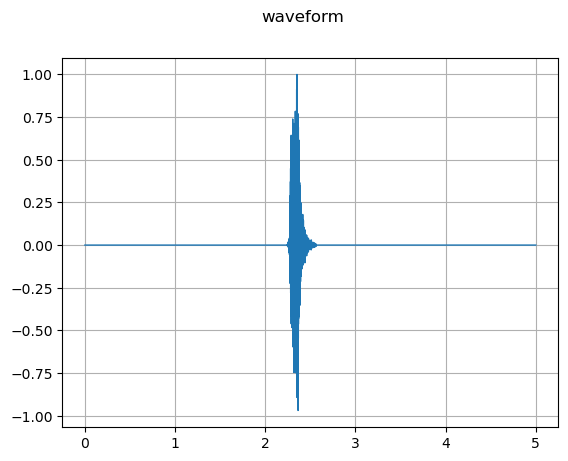

In [8]:
plot_waveform(waveform, sample_rate)

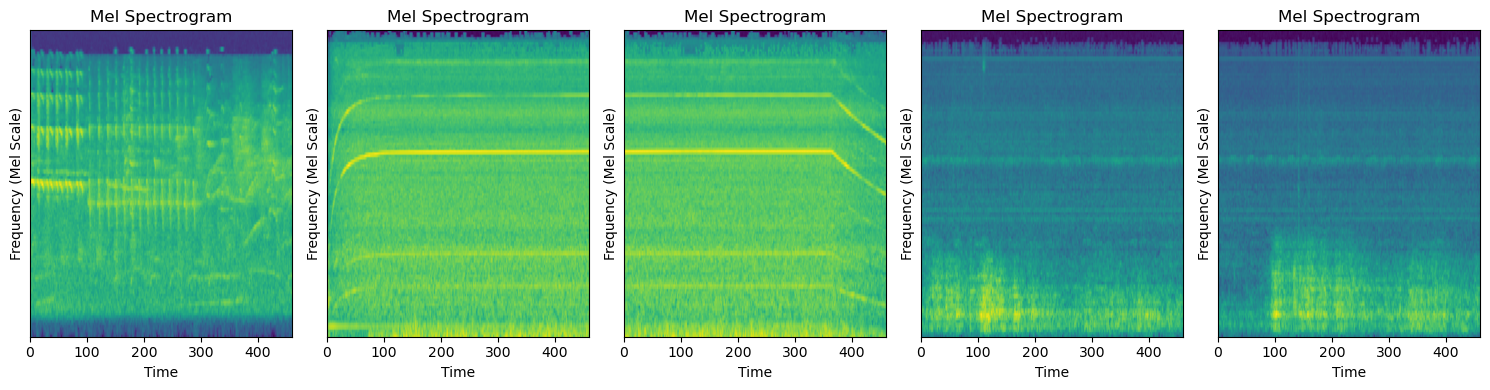

In [25]:
fig, axes = plt.subplots(1, 5, figsize=(15, 4))
for i, row in enumerate(meta_df[['filename', 'category']][1:6].iterrows()):

    #n_fft = 250 * (i + 1)
    filename = row[1][0] # wavファイル名
    category = row[1][1] # そのファイルのカテゴリ
    # Load audio data
    waveform, sample_rate = torchaudio.load(path + "/audio/" + filename)

    # Create MelSpectrogram transformation
    mel_spectrogram = torchaudio.transforms.MelSpectrogram(
    sample_rate=sample_rate,
    n_fft=2048,            # Adjust n_fft as needed
    hop_length=480,       # Adjust hop_length as needed
    n_mels=128            # Number of mel filters
    )

    # Apply the transformation
    mel_spec = mel_spectrogram(waveform).squeeze(0)

    # Create a figure with 3 subplots in one row
    # Plot the mel spectrogram
    axes[i].imshow(torch.log(mel_spec), cmap="viridis", origin="lower", aspect="auto")
    axes[i].set_title("Mel Spectrogram")
    axes[i].set_xlabel("Time")
    axes[i].set_ylabel("Frequency (Mel Scale)")
    axes[i].set_yticks([])  # Hide y-axis ticks


# Adjust layout spacing
plt.tight_layout()

# Show the plots
plt.show()

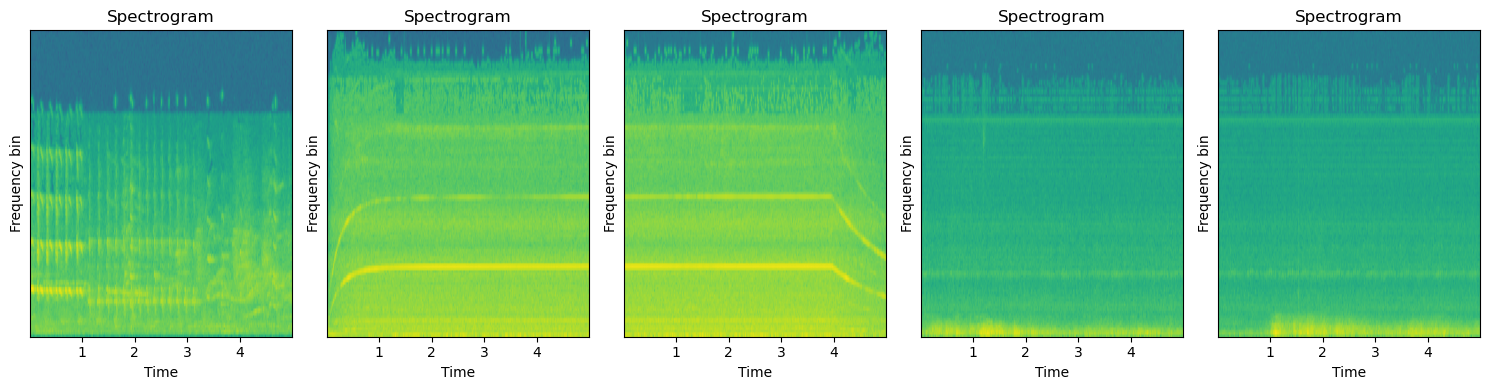

In [26]:
fig, axes = plt.subplots(1, 5, figsize=(15, 4))
for i, row in enumerate(meta_df[['filename', 'category']][1:6].iterrows()):

    #n_fft = 250 * (i + 1)
    filename = row[1][0] # wavファイル名
    category = row[1][1] # そのファイルのカテゴリ
    # Load audio data
    waveform, sample_rate = torchaudio.load(path + "/audio/" + filename)


    # Create a figure with 3 subplots in one row
    # Plot the mel spectrogram
    axes[i].specgram(waveform[0], Fs=sample_rate)
    axes[i].set_title("Spectrogram")
    axes[i].set_xlabel("Time")
    axes[i].set_ylabel("Frequency bin")
    axes[i].set_yticks([])  # Hide y-axis ticks


# Adjust layout spacing
plt.tight_layout()

# Show the plots
plt.show()

In [22]:
waveform, sample_rate = torchaudio.load(path + "/audio/" + str(audio_sample))
mel_spectrogram = torchaudio.transforms.MelSpectrogram(
    sample_rate=sample_rate,
    n_fft=2048,            # Adjust n_fft as needed
    hop_length=480,       # Adjust hop_length as needed
    n_mels=128            # Number of mel filters
    )

#Mel frequency spectrogram of size (channels, n_mels, time).
mel_spec = mel_spectrogram(waveform)
print(mel_spec.shape)
mel_spec = mel_spec.squeeze(0)
print(mel_spec.shape)

torch.Size([1, 128, 460])
torch.Size([128, 460])
